In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read the data into a dataframe
mushroom_data = pd.read_csv("./resources/mushrooms.csv")

In [5]:
# Check the dimensions and attr of the df
print(mushroom_data.shape)

(8124, 23)


In [6]:
print(mushroom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
# Check the overall distribution of the features
print(mushroom_data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [14]:
# Split the classes
edible_shrooms = mushroom_data[mushroom_data["class"] == "e"]
pois_shrooms = mushroom_data[mushroom_data["class"] == "p"]

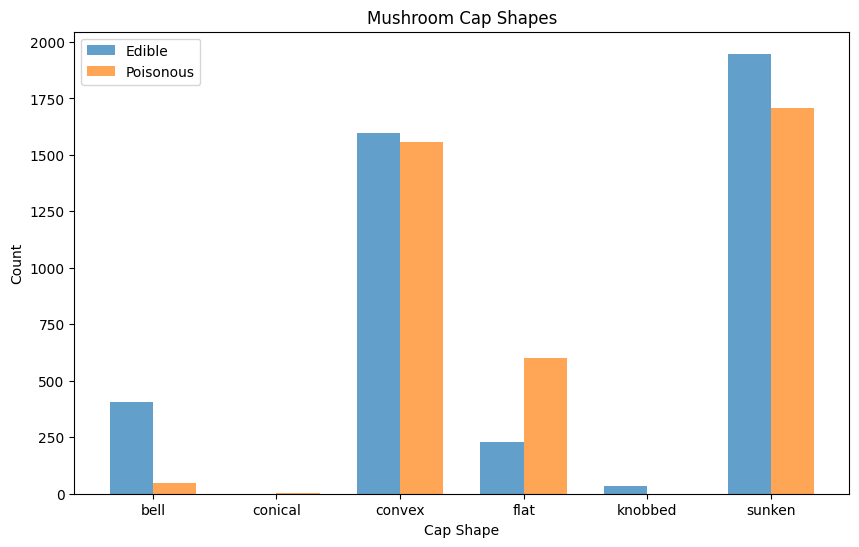

In [27]:
# Check the effect of the cap shape on the class
shapes = {
    'b': 'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    'k': 'knobbed',
    's': 'sunken'
}

# Initialize counts for all possible shapes
edible_values = []
pois_values = []

# Get counts for each shape in order
for shape_code in sorted(shapes.keys()):
    edible_count = len(edible_shrooms[edible_shrooms['cap-shape'] == shape_code])
    pois_count = len(pois_shrooms[pois_shrooms['cap-shape'] == shape_code])
    edible_values.append(edible_count)
    pois_values.append(pois_count)

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(shapes))

# Create simple bar plot with offset
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, edible_values, width, label='Edible', alpha=0.7)
plt.bar(x + width/2, pois_values, width, label='Poisonous', alpha=0.7)

# Customize the plot
plt.title('Mushroom Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.xticks(x, list(shapes.values()))
plt.legend()

Now, use the `MushroomUtils` class to get the labeled data and plot a pairplot.
Since we want to classify the mushrooms as either edible or poisonous, we will use the `class` column as the label.
Also, note that get_labeled_data() uses the LabelEncoder to encode the labels.
It is useful for the tree-based models, but not for the regression models.

In [29]:
from main import MushroomUtils
mush_utils = MushroomUtils("./resources/mushrooms.csv")

labeled_shroom_data = mush_utils.get_labeled_data()

In [33]:
labeled_shroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


/var/folders/_l/h44zx0_s3pd47gnlplq87_1h0000gn/T/ipykernel_3898/1763544999.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

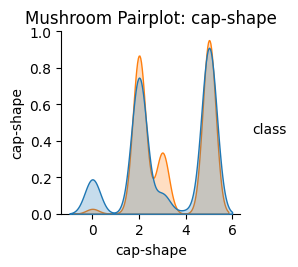

<Figure size 1000x600 with 0 Axes>

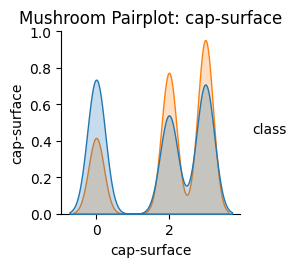

<Figure size 1000x600 with 0 Axes>

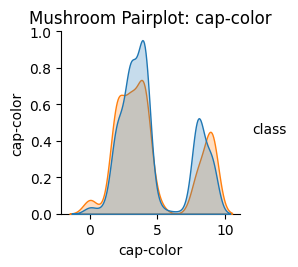

<Figure size 1000x600 with 0 Axes>

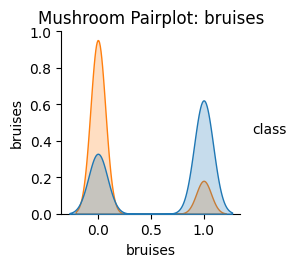

<Figure size 1000x600 with 0 Axes>

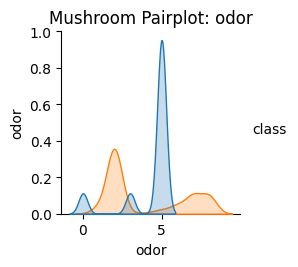

<Figure size 1000x600 with 0 Axes>

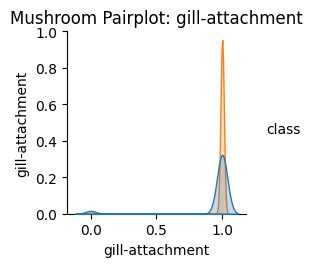

<Figure size 1000x600 with 0 Axes>

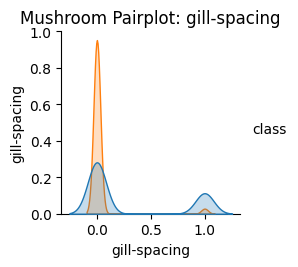

<Figure size 1000x600 with 0 Axes>

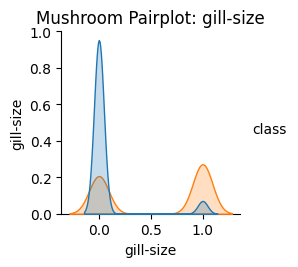

<Figure size 1000x600 with 0 Axes>

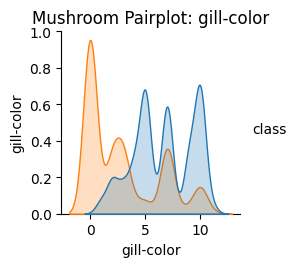

<Figure size 1000x600 with 0 Axes>

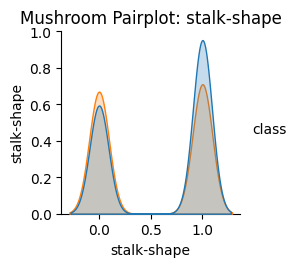

<Figure size 1000x600 with 0 Axes>

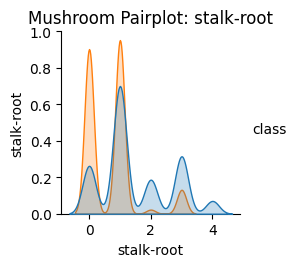

<Figure size 1000x600 with 0 Axes>

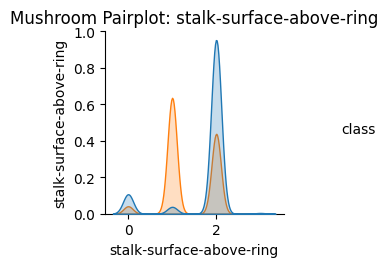

<Figure size 1000x600 with 0 Axes>

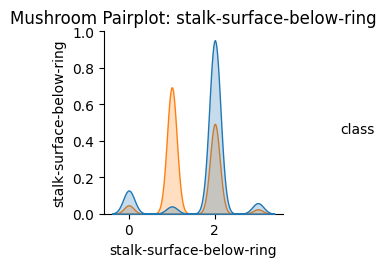

<Figure size 1000x600 with 0 Axes>

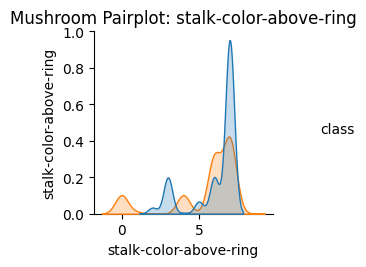

<Figure size 1000x600 with 0 Axes>

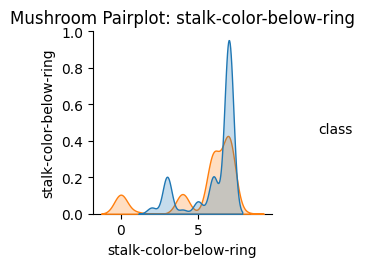

<Figure size 1000x600 with 0 Axes>

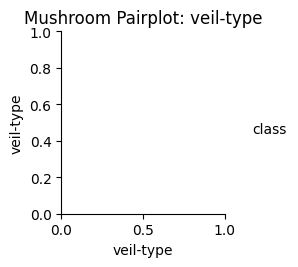

<Figure size 1000x600 with 0 Axes>

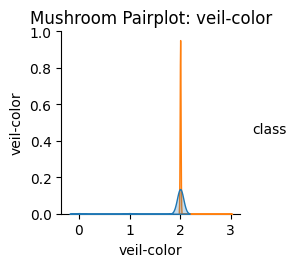

<Figure size 1000x600 with 0 Axes>

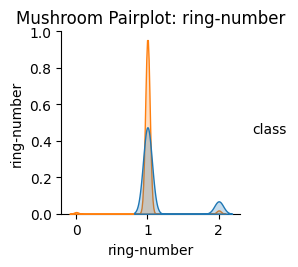

<Figure size 1000x600 with 0 Axes>

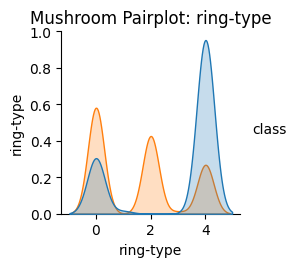

<Figure size 1000x600 with 0 Axes>

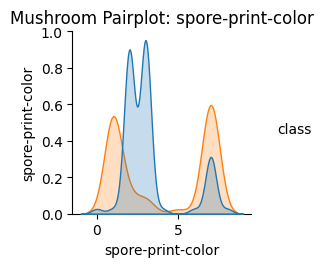

<Figure size 1000x600 with 0 Axes>

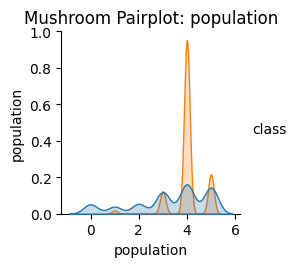

<Figure size 1000x600 with 0 Axes>

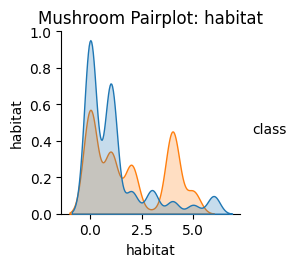

In [35]:
import seaborn as sns

for col in labeled_shroom_data.columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.pairplot(labeled_shroom_data, hue='class', vars=[col])
    plt.title(f'Mushroom Pairplot: {col}')